In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_2013 = pd.read_csv('Resources/data/train_data_2013.csv')
data_2014 = pd.read_csv('Resources/data/train_data_2014.csv')
data_2015 = pd.read_csv('Resources/data/train_data_2015.csv')
data_2016 = pd.read_csv('Resources/data/train_data_2016.csv')
data_2017 = pd.read_csv('Resources/data/test_data_2017.csv')

In [3]:
data1 = pd.concat([data_2013, data_2014, data_2015, data_2016, data_2017], ignore_index=True)

C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
data1.year.value_counts()

2013    260
2016    241
2014    213
2017    195
2015    171
Name: year, dtype: int64

In [5]:
data = pd.get_dummies(data1, columns=['production','rating'], drop_first = True)
data.head()

,box_office,country,genre,runtime,title,year,production_21 Laps Entertainment,production_A Day in the Life Films,production_A24,production_A24 Films,...,production_Yale Productions,production_Zeitgeist Films,production_eOne Entertainment,rating_NOT RATED,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_Unrated
0,50628650,2,3,134,12 Years a Slave,2013,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,73500000,1,3,109,2 Guns,2013,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,25675765,1,1,93,21 & Over,2013,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,95001343,1,3,128,42,2013,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20518224,4,3,128,47 Ronin,2013,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
train = data.loc[data.year != 2017]
test = data.loc[data.year == 2017]

In [7]:
X_train = train[train.columns[~train.columns.isin(['box_office','title', 'year'])]]
y_train = train['box_office'].values.reshape(-1,1)

X_test = test[test.columns[~test.columns.isin(['box_office','title', 'year'])]]
y_test = test['box_office'].values.reshape(-1,1)

In [8]:
print(X_test.shape, y_test.shape)

(195, 329) (195, 1)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.46587887131765676
Testing Data Score: -7.2600101321732235e+19


Text(0.5, 1.0, 'Residual Plot')

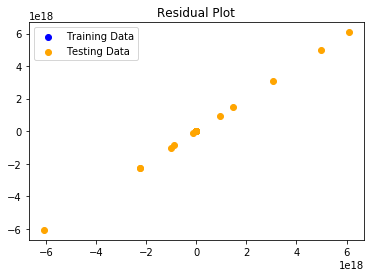

In [12]:
### BEGIN SOLUTION
fig3, ax3 = plt.subplots()
ax3.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
ax3.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
ax3.legend()
ax3.set_title("Residual Plot")
### END SOLUTION  Out [7]:  Text(0.5,1,'Residual Plot')

In [ ]:
fig3.savefig('Resources/images/residual_plot.png', figsize=(1044/166, 696/166), dpi=166)

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(y_train, X_train['runtime'], c="blue", label="Train Data")

In [ ]:
fig2.savefig('Resources/images/train_scatter.png', figsize=(1044/166, 696/166), dpi=166)

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
box_office = data['box_office']
runtime = data['runtime']

In [ ]:
runtime = runtime.astype(np.float64) 
box_office = box_office.astype(np.float64)

In [ ]:
bo_slope, bo_int, bo_r, bo_p, bo_std_err = stats.linregress(
    runtime, box_office)
bo_fit = bo_slope * runtime + bo_int

stats.linregress(runtime, box_office)

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(min(data['runtime']), max(data['runtime']))
ax.plot(data['runtime'], data['box_office'], linewidth=0, marker="o")
ax.set_title("Runtime vs Box Office")
ax.set_ylabel("Box Office ($ Millions)")
ax.set_xlabel("Runtime (mins)")

In [ ]:
fig.savefig('Resources/images/runtime_bo.png', figsize=(1044/166, 696/166), dpi=166)

In [ ]:
box_office = data['box_office']
genre = data['genre']

In [ ]:
genre = genre.astype(np.float64) 
box_office = box_office.astype(np.float64)

In [ ]:
gn_slope, gn_int, gn_r, gn_p, gn_std_err = stats.linregress(
    genre, box_office)
gn_fit = gn_slope * runtime + gn_int

stats.linregress(genre, box_office)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_xlim(min(data['genre']), max(data['genre']))
ax1.plot(data['genre'], data['box_office'], linewidth=0, marker="o")
# ax1.plot(data['genre'], gn_fit, "r--", linewidth=1)
ax1.set_title("Genre vs Box Office")
ax1.set_ylabel("Box Office ($ Millions)")
ax1.set_xlabel("Genre (# of categories)")

In [ ]:
fig1.savefig('Resources/images/genre_bo.png', figsize=(1044/166, 696/166), dpi=166)

In [ ]:
country = data.boxplot(by= 'country', column='box_office', grid=False)
fig = country.get_figure()
fig.suptitle("")

In [ ]:
country.figure.savefig('Resources/images/country_bo.png', figsize=(1044/166, 696/166), dpi=166)

In [ ]:
rating = data1.boxplot(by='rating', column='box_office',grid=False)
fig = rating.get_figure()
fig.suptitle("")

In [ ]:
rating.figure.savefig('Resources/images/rating_bo.png', figsize=(1044/166, 696/166), dpi=166)

In [ ]:
data1.production.value_counts()

In [ ]:
filter_list = ['Warner Bros. Pictures','20th Century Fox','Paramount Pictures','Universal Pictures','Walt Disney Pictures']
data1 = data1[data1.production.isin(filter_list)]
data1

In [ ]:
boxplot2 = data1.boxplot(by='production', column='box_office',grid=False, rot =15)
fig = boxplot2.get_figure()
fig.suptitle("")

In [ ]:
boxplot2.figure.savefig('Resources/images/production_bo.png', figsize=(1044/166, 696/166), dpi=166)